# Convolutional Neural Network ( For Computer Vision )

# Import all necessary modules

In [32]:
from tensorflow import keras
from tensorflow.keras import layers
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np


# Definition the convolution neural network and the softmax

In [33]:
inputs = keras.Input(shape=(256, 256, 3))
x = layers.Rescaling(1./255)(inputs) # scales all numbers between 0 and 1 to make calculations quicker
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x) # regularlization - makes sure the model doesn't get out of hand
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x) # turns it into a one dimensional vector
outputs = layers.Dense(6, activation="softmax")(x) # neural network that calculates probabilities
model = keras.Model(inputs=inputs, outputs=outputs)

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                      

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [36]:
new_base_dir = pathlib.Path("data/pills")

In [37]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(256, 256),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test2",
    image_size=(256, 256),
    batch_size=32)

Found 534 files belonging to 6 classes.
Found 60 files belonging to 6 classes.


# Lets train the model now

In [38]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=test_dataset,
    callbacks=callbacks)

Epoch 1/30


17/17 [==============================] - 3s 116ms/step - loss: 1.9579 - accuracy: 0.2266 - val_loss: 1.7556 - val_accuracy: 0.2667
Epoch 2/30
17/17 [==============================] - 2s 88ms/step - loss: 1.5960 - accuracy: 0.3708 - val_loss: 1.4418 - val_accuracy: 0.4833
Epoch 3/30
17/17 [==============================] - 1s 71ms/step - loss: 1.0285 - accuracy: 0.6180 - val_loss: 1.1937 - val_accuracy: 0.4500
Epoch 4/30
17/17 [==============================] - 1s 73ms/step - loss: 0.7535 - accuracy: 0.7154 - val_loss: 2.3131 - val_accuracy: 0.5000
Epoch 5/30
17/17 [==============================] - 1s 72ms/step - loss: 0.7554 - accuracy: 0.7154 - val_loss: 1.0336 - val_accuracy: 0.6000
Epoch 6/30
17/17 [==============================] - 1s 69ms/step - loss: 0.5632 - accuracy: 0.8202 - val_loss: 1.7479 - val_accuracy: 0.6167
Epoch 7/30
17/17 [==============================] - 1s 71ms/step - loss: 0.5023 - accuracy: 0.8483 - val_loss: 1.8827 - val_accuracy: 0.4667
Epoch 8/30
17/17 [=====

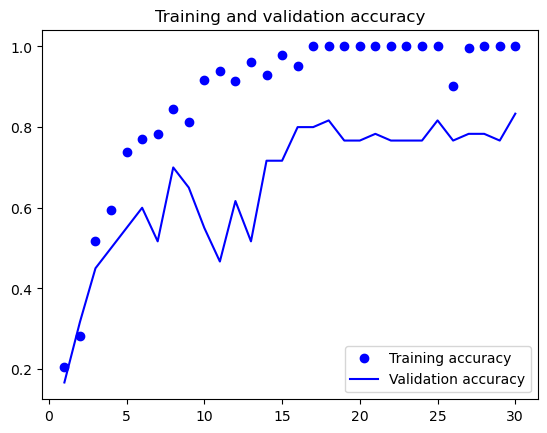

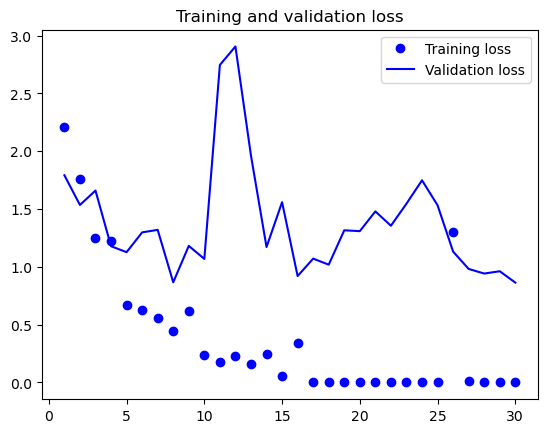

In [8]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [9]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

2/2 [==============================] - 0s 42ms/step - loss: 0.8641 - accuracy: 0.8333
Test accuracy: 0.833


# Prediction demonstration on unseen pictures

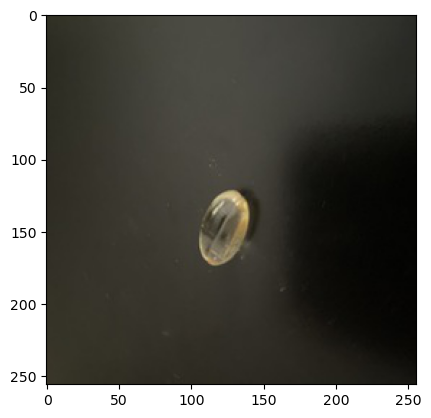

In [42]:
# prediction of an advil pill
img = image.load_img('data/pills/prediction/advil/IMG_1224JPG.jpg', target_size=(256, 256))
img_array = image.img_to_array(img)

plt.imshow(img_array/255.)  # Divide by 255 to scale the pixel values between 0 and 1
plt.show()


In [43]:

img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
print(predictions)
print(['advil','calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b' ])

labels = ['advil','calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b']
predicted_label = labels[np.argmax(predictions)]
print("")
print(f'Hey Amanda, I predict this to be {predicted_label}!')



1/1 [==============================] - 0s 14ms/step
[[9.9999976e-01 1.0780351e-07 1.7046354e-16 6.7327597e-09 1.6365610e-18
  1.2931689e-07]]
['advil', 'calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b']

Hey Amanda, I predict this to be advil!


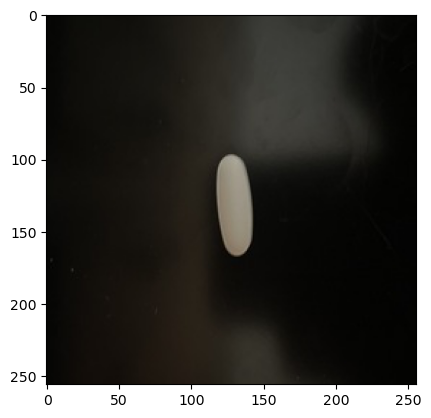

In [44]:
# Prediction of a calcium pill
img = image.load_img('data/pills/prediction/calcium/IMG_0607JPG.jpg', target_size=(256, 256))
img_array = image.img_to_array(img)

plt.imshow(img_array/255.)  # Divide by 255 to scale the pixel values between 0 and 1
plt.show()

In [45]:
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
print(predictions)
print(['advil','calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b' ])

labels = ['advil','calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b']
predicted_label = labels[np.argmax(predictions)]
print("")
print(f'Hey Amanda, I predict this to be {predicted_label}!')

1/1 [==============================] - 0s 14ms/step
[[7.8970722e-08 9.9999988e-01 1.7341965e-28 4.2971197e-21 4.2709494e-30
  3.4732446e-09]]
['advil', 'calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b']

Hey Amanda, I predict this to be calcium!


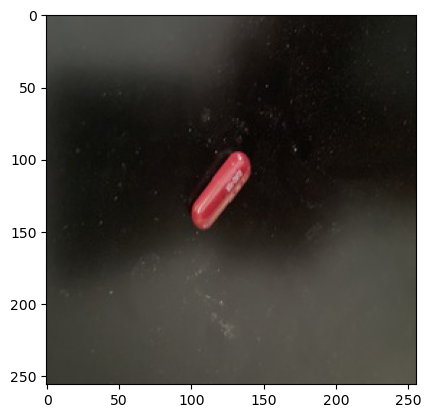

In [46]:
# Prediction of a iron pill
img = image.load_img('data/pills/prediction/iron/IMG_1138JPG.jpg', target_size=(256, 256))
img_array = image.img_to_array(img)

plt.imshow(img_array/255.)  # Divide by 255 to scale the pixel values between 0 and 1
plt.show()

In [47]:
img_array = np.expand_dims(img_array, axis=0)


predictions = model.predict(img_array)
print(predictions)
print(['advil','calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b' ])

labels = ['advil','calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b']
predicted_label = labels[np.argmax(predictions)]
print("")
print(f'Hey Amanda, I predict this to be {predicted_label}!')

1/1 [==============================] - 0s 16ms/step
[[5.1805508e-22 4.8577082e-36 1.0000000e+00 2.8068799e-21 4.7659644e-11
  5.9985220e-14]]
['advil', 'calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b']

Hey Amanda, I predict this to be iron!


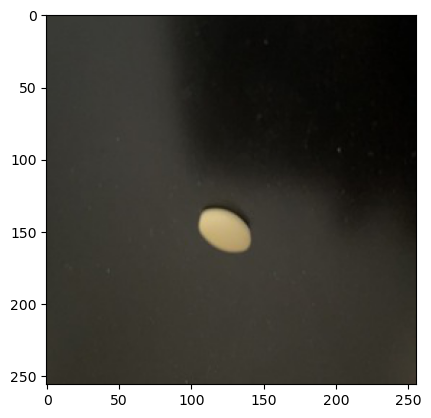

In [48]:
# predict pantaloc
img = image.load_img('data/pills/prediction/pantaloc/IMG_0929JPG.jpg', target_size=(256, 256))
img_array = image.img_to_array(img)

plt.imshow(img_array/255.)  # Divide by 255 to scale the pixel values between 0 and 1
plt.show()

In [49]:
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
print(predictions)
print(['advil','calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b' ])

labels = ['advil','calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b']
predicted_label = labels[np.argmax(predictions)]
print("")
print(f'Hey Amanda, I predict this to be {predicted_label}!')

1/1 [==============================] - 0s 15ms/step
[[7.1326190e-07 2.4250416e-17 1.1515559e-13 9.9999928e-01 2.4476625e-14
  8.4407157e-09]]
['advil', 'calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b']

Hey Amanda, I predict this to be pantaloc!


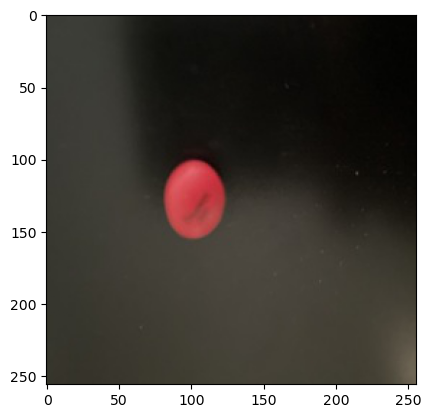

In [50]:
# predict tylenol

img = image.load_img('data/pills/prediction/tylenol/IMG_0831JPG.jpg', target_size=(256, 256))
img_array = image.img_to_array(img)

plt.imshow(img_array/255.)  # Divide by 255 to scale the pixel values between 0 and 1
plt.show()

In [51]:
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
print(predictions)
print(['advil','calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b' ])

labels = ['advil','calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b']
predicted_label = labels[np.argmax(predictions)]
print("")
print(f'Hey Amanda, I predict this to be {predicted_label}!')

1/1 [==============================] - 0s 13ms/step
[[0.00000000e+00 0.00000000e+00 4.27682883e-17 1.19900306e-32
  1.00000000e+00 1.87842063e-16]]
['advil', 'calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b']

Hey Amanda, I predict this to be tylenol!


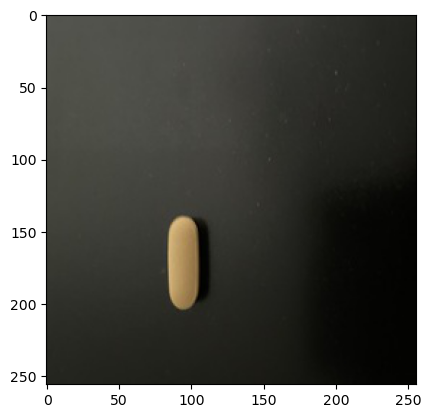

In [54]:
# predict vitamin b

img = image.load_img('data/pills/prediction/vitamin_b/IMG_0725JPG.jpg', target_size=(256, 256))
img_array = image.img_to_array(img)

plt.imshow(img_array/255.)  # Divide by 255 to scale the pixel values between 0 and 1
plt.show()

In [55]:
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
print(predictions)
print(['advil','calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b' ])

labels = ['advil','calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b']
predicted_label = labels[np.argmax(predictions)]
print("")
print(f'Hey Amanda, I predict this to be {predicted_label}!')

1/1 [==============================] - 0s 20ms/step
[[2.5775259e-07 5.6775906e-10 1.6950287e-06 2.5935846e-04 2.7314487e-10
  9.9973875e-01]]
['advil', 'calcium', 'iron', 'pantaloc', 'tylenol', 'vitamin_b']

Hey Amanda, I predict this to be vitamin_b!
